In [1]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

# https://ldjwj.github.io/DL_Basic/part04_04_dl_cnn_01/ch05_01_Keras_LAB01_CNN_A1_2205.html

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
# 입력층은 이미지 그대로, 입력층의 값의 범위 정규화
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# 출력층 데이터-원핫 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1,1),
                        activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [9]:
%%time

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, 
          validation_data=(test_images, test_labels), epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 27s 28ms/step - loss: 0.1673 - accuracy: 0.9481 - val_loss: 0.0771 - val_accuracy: 0.9763
Epoch 2/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0497 - accuracy: 0.9851 - val_loss: 0.0650 - val_accuracy: 0.9792
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.0305 - val_accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0261 - val_accuracy: 0.9914
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0277 - val_accuracy: 0.9912
CPU times: total: 10min 35s
Wall time: 2min 6s


In [15]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0277 - accuracy: 0.9912


[0.02767028845846653, 0.9911999702453613]

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [16]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
print(path_to_zip)

68606236/68606236 [==============================] - 40s 1us/step
C:\Users\bman4\.keras\datasets\cats_and_dogs.zip


In [17]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)

C:\Users\bman4\.keras\datasets\cats_and_dogs_filtered


In [18]:
train_dir = os.path.join(PATH, 'train')            # 학습용
validation_dir = os.path.join(PATH, 'validation')  # 평가용
print(train_dir)
print(validation_dir)

C:\Users\bman4\.keras\datasets\cats_and_dogs_filtered\train
C:\Users\bman4\.keras\datasets\cats_and_dogs_filtered\validation


In [19]:
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures

print("개 : ", train_dogs_dir)
print("고양이 : ", train_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures

print("개 : ", validation_dogs_dir)
print("고양이 : ", validation_cats_dir)

개 :  C:\Users\bman4\.keras\datasets\cats_and_dogs_filtered\train\dogs
고양이 :  C:\Users\bman4\.keras\datasets\cats_and_dogs_filtered\train\cats
개 :  C:\Users\bman4\.keras\datasets\cats_and_dogs_filtered\validation\dogs
고양이 :  C:\Users\bman4\.keras\datasets\cats_and_dogs_filtered\validation\cats


In [20]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [21]:
## 이미지 개수
print('Total training cat images:', num_cats_tr)  # 고양이
print('Total training dog images:', num_dogs_tr)  # 개
print("--")

print('Total validation cat images:', num_cats_val)  # 고양이
print('Total validation dog images:', num_dogs_val)  # 개
print("--")

print("Total training images:", total_train)  #  학습용 = 개 + 고양이
print("Total validation images:", total_val)  #  평가용 = 개 + 고양이

Total training cat images: 1000
Total training dog images: 1000
--
Total validation cat images: 500
Total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [22]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [23]:
train_image_generator = ImageDataGenerator(rescale=1./255)  # 학습용 데이터 생성기
validation_image_generator = ImageDataGenerator(rescale=1./255) # 평가용 데이터 생성기

In [24]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           seed=42)

Found 2000 images belonging to 2 classes.


In [25]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                   directory=validation_dir,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode='binary', 
                                                   seed=42)

Found 1000 images belonging to 2 classes.


In [28]:
sample_training_images, empty = next(train_data_gen)
sample_training_images.shape

(128, 150, 150, 3)

In [26]:
# 이 함수는 이미지를 plot를 하는 함수.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

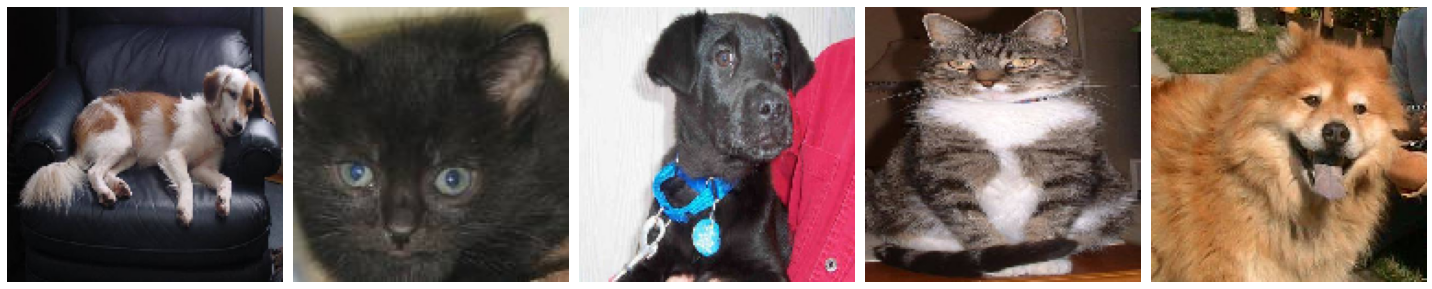

In [29]:
plotImages(sample_training_images[:5])

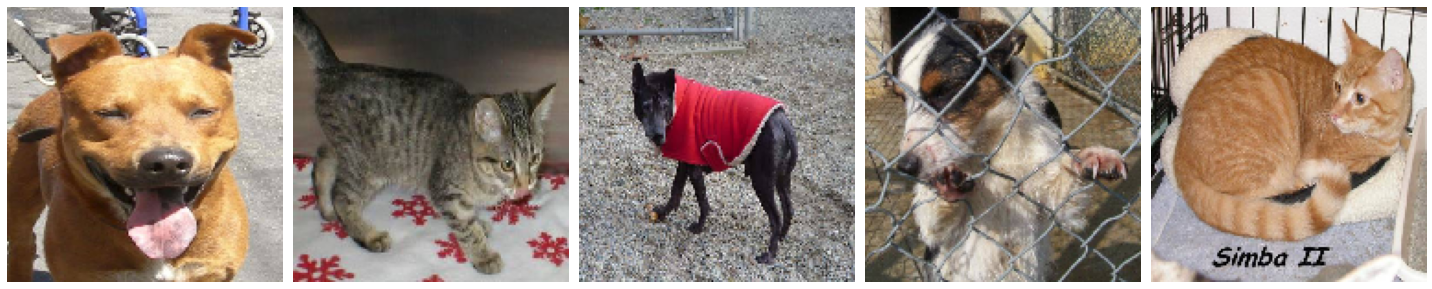

In [30]:
sample_training_images, empty = next(train_data_gen)
plotImages(sample_training_images[:5])

In [35]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 64)      

In [39]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [41]:
%%time

history = model.fit(train_data_gen, steps_per_epoch = total_train//batch_size, epochs = epochs, validation_data = val_data_gen,
                   validation_steps = total_val)

Epoch 1/15
15/15 [==============================] - 24s 2s/step - loss: 0.6860 - accuracy: 0.5379 - val_loss: 0.6656 - val_accuracy: 0.5240
Epoch 2/15
15/15 [==============================] - 16s 1s/step - loss: 0.6515 - accuracy: 0.6095
Epoch 3/15
15/15 [==============================] - 16s 1s/step - loss: 0.6294 - accuracy: 0.6368
Epoch 4/15
15/15 [==============================] - 17s 1s/step - loss: 0.5602 - accuracy: 0.7099
Epoch 5/15
15/15 [==============================] - 19s 1s/step - loss: 0.5001 - accuracy: 0.7543
Epoch 6/15
15/15 [==============================] - 18s 1s/step - loss: 0.4552 - accuracy: 0.7901
Epoch 7/15
15/15 [==============================] - 17s 1s/step - loss: 0.4118 - accuracy: 0.8243
Epoch 8/15
15/15 [==============================] - 21s 1s/step - loss: 0.3428 - accuracy: 0.8526
Epoch 9/15
15/15 [==============================] - 19s 1s/step - loss: 0.3287 - accuracy: 0.8579
Epoch 10/15
15/15 [==============================] - 18s 1s/step - loss: 0.2